In [11]:
import sys
sys.path.append(r'/Users/liamjeske/PycharmProjects/pythonProject2/src')

from Unsupervised.KMeans import KMeans
from Unsupervised.KMediods import KMediods

from scipy.io import loadmat
import util
import numpy as np
import matplotlib.pyplot as plt

vote_mat = loadmat(r'/Users/liamjeske/Downloads/CongressionalVoteData.mat')
vote_labels = vote_mat['I']
vote_data = vote_mat['X'].T


vote_attributes = ["Handicapped Infants", "Water Project Cost Sharing", "Adoption of the Budget Resolution", "Physician Fee Freeze", "El Salvador Aid", "Religious Groups In Schools", "Anti-Satellite Test Ban", "Aid to Nicaraguan Contras", "MX Missile", "Immigration", "Synfuels Corporation Cutback", "Education Spending", "Superfund Right to Sue", "Crime", "Duty Free Exports", "Export Administration Act South Africa"]

In [12]:
def congressional_distance(a, b):
    """
    Function that calculates dissimilarity between congressmen according to their
    voting record on 16 issues in 1984
    :param a: voting record of congressman a
    :param b: voting record of congressman b
    :return: dissimilarity between the two congressmen
    """
    # gather the indices of where both members a and b voted on the same issues
    ind = np.intersect1d(np.nonzero(a), np.nonzero(b))

    # if member a never voted on the same issue as member b, the dissimilarity is 0.5
    if len(ind) == 0:
        return 0.5
    # dissimilarity is the number of times a and b voted differently on the same issue
    # divided by the number of times they voted on the same issue
    return np.sum(np.not_equal(a[ind], b[ind])) / len(ind)


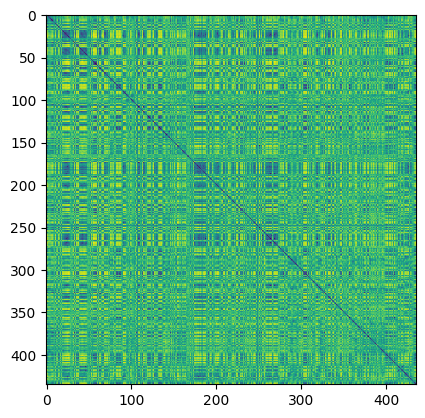

In [13]:
plt.imshow(util.dm(vote_data,vote_data))

In [14]:
meds = KMediods(2)
meds.fit(vote_data,congressional_distance)


In [21]:
dems = vote_labels[np.array(meds.I_assign,dtype=bool)]
reps = vote_labels[~np.array(meds.I_assign,dtype=bool)]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1 but corresponding boolean dimension is 435

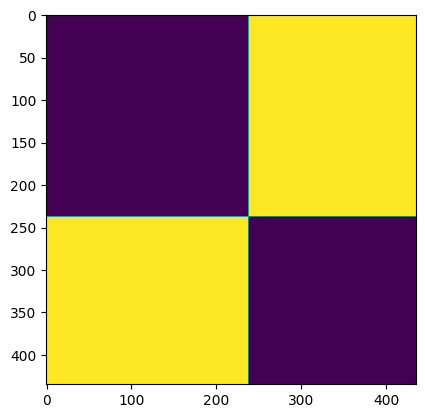

In [33]:
plt.imshow(util.dm(vote_data[inds],vote_data[inds]))

In [32]:
inds = sorted(meds.I_assign)
